In [1]:
import sys
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Para poder importar src.*
ROOT = Path.cwd().resolve().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(ROOT))

from src.viz.plots import corr_heatmap  

ROOT, ROOT.exists()


(WindowsPath('C:/Users/Usuario/OneDrive/Desktop/Penguin/analisis-de-datos'),
 True)

In [4]:
# Paths
CA_PATH = ROOT / "data" / "raw" / "california_housing" / "housing.csv"
ES_PATH = ROOT / "data" / "processed" / "energy_spain_clean.csv"

df_ca = pd.read_csv(CA_PATH)
df_es = pd.read_csv(ES_PATH, parse_dates=["datetime"]).set_index("datetime")

df_ca.shape, df_es.shape

((20640, 10), (1826, 20))

In [8]:
summary = pd.DataFrame([
    {
        "dataset": "california_housing",
        "n_observaciones": len(df_ca),
        "variable_objetivo": "median_house_value",
        "media_objetivo": df_ca["median_house_value"].mean(),
        "mediana_objetivo": df_ca["median_house_value"].median(),
        "desvio_objetivo": df_ca["median_house_value"].std(),
    },
    {
        "dataset": "energy_spain",
        "n_observaciones": len(df_es),
        "variable_objetivo": "price_es",
        "media_objetivo": df_es["price_es"].mean(),
        "mediana_objetivo": df_es["price_es"].median(),
        "desvio_objetivo": df_es["price_es"].std(),
    },
])

summary


,dataset,n_observaciones,variable_objetivo,media_objetivo,mediana_objetivo,desvio_objetivo
0,california_housing,20640,median_house_value,206855.816909,179700.000000,115395.615874
1,energy_spain,1826,price_es,48.356157,49.474792,13.760859


In [9]:
# Subconjunto de columnas interesantes en cada dataset
ca_cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
es_cols = ["price_es", "demand_es", "generation_total", "generation_wind"]

display(df_ca[ca_cols].head())
display(df_es[es_cols].head())


,median_house_value,median_income,total_rooms,housing_median_age
0,452600.0,8.3252,880.0,41.0
1,358500.0,8.3014,7099.0,21.0
2,352100.0,7.2574,1467.0,52.0
3,341300.0,5.6431,1274.0,52.0
4,342200.0,3.8462,1627.0,52.0


,price_es,demand_es,generation_total,generation_wind
datetime,,,,
2014-01-01 23:00:00,25.280833,28191.597222,642771.8,277443.9
2014-01-02 23:00:00,39.924167,28465.180556,658078.5,237323.1
2014-01-03 23:00:00,4.992083,26860.493056,680564.6,329506.6
2014-01-04 23:00:00,4.091667,25333.597222,644494.7,292138.3
2014-01-05 23:00:00,13.587500,23905.541667,598661.4,223942.0


In [10]:
corr_heatmap(
    df_ca,
    ca_cols,
    "Correlaciones internas – California Housing",
    fname="ca_corr_core_from_nb03.png",
)

corr_heatmap(
    df_es,
    es_cols,
    "Correlaciones internas – Energía España",
    fname="es_corr_core_from_nb03.png",
)


Figura guardada: C:\Users\Usuario\OneDrive\Desktop\Penguin\analisis-de-datos\reports\figures\ca_corr_core_from_nb03.png
Figura guardada: C:\Users\Usuario\OneDrive\Desktop\Penguin\analisis-de-datos\reports\figures\es_corr_core_from_nb03.png


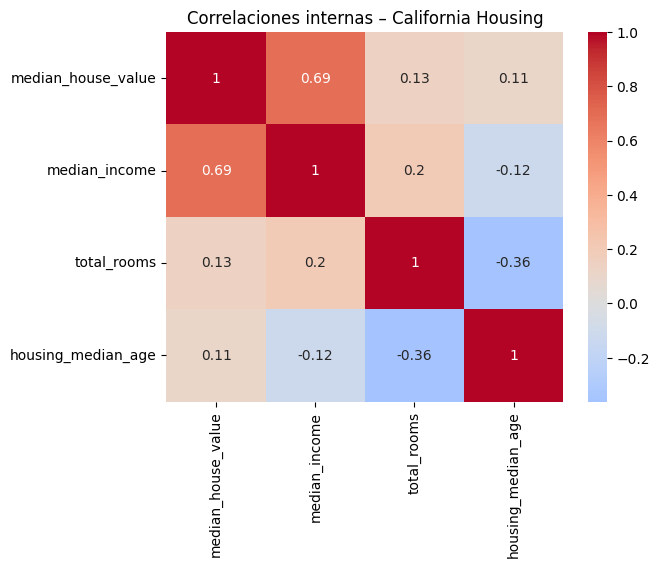

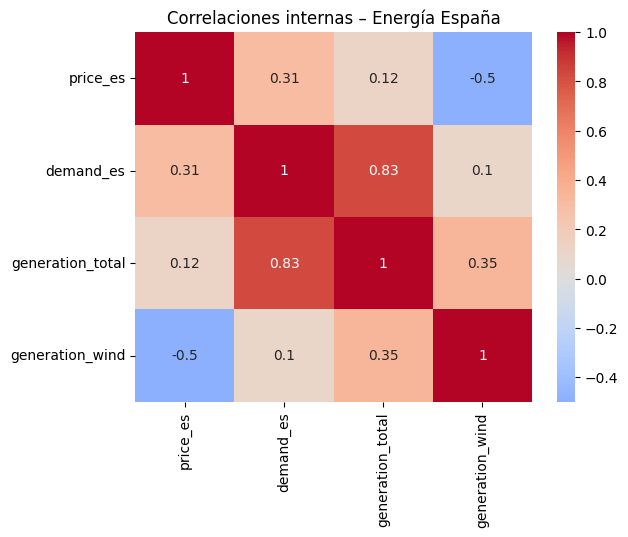

In [11]:
# Matriz de correlación
corr_ca = df_ca[ca_cols].corr()
sns.heatmap(corr_ca, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones internas – California Housing")
plt.show()

corr_es = df_es[es_cols].corr()
sns.heatmap(corr_es, annot=True, cmap="coolwarm", center=0)
plt.title("Correlaciones internas – Energía España")
plt.show()

In [12]:
kpis = pd.DataFrame([
    {
        "dataset": "california_housing",
        "precio_medio": df_ca["median_house_value"].mean(),
        "precio_mediano": df_ca["median_house_value"].median(),
        "coef_var": df_ca["median_house_value"].std() / df_ca["median_house_value"].mean(),
    },
    {
        "dataset": "energy_spain",
        "precio_medio": df_es["price_es"].mean(),
        "precio_mediano": df_es["price_es"].median(),
        "coef_var": df_es["price_es"].std() / df_es["price_es"].mean(),
    },
])

kpis


,dataset,precio_medio,precio_mediano,coef_var
0,california_housing,206855.816909,179700.000000,0.557855
1,energy_spain,48.356157,49.474792,0.284573


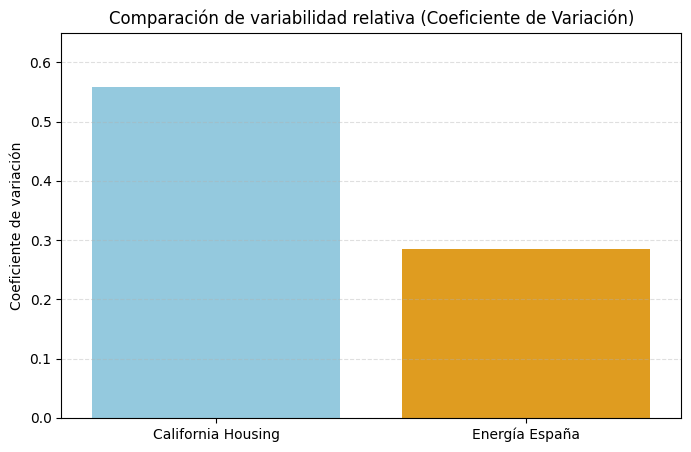

In [14]:
# KPIs obtenidos
kpis_plot = pd.DataFrame({
    "dataset": ["California Housing", "Energía España"],
    "coef_var": [0.557855, 0.284573],
})

plt.figure(figsize=(8,5))
sns.barplot(data=kpis_plot, x="dataset", y="coef_var", palette=["skyblue", "orange"], hue="dataset", legend=False)
plt.title("Comparación de variabilidad relativa (Coeficiente de Variación)")
plt.ylabel("Coeficiente de variación")
plt.xlabel("")
plt.ylim(0,0.65)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()